<a href="https://colab.research.google.com/github/jisoo1738/2020/blob/main/Height_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install neptune-client psutil

     |████████████████████████████████| 243 kB 7.2 MB/s 
     |████████████████████████████████| 829 kB 13.5 MB/s 
     |████████████████████████████████| 68 kB 6.5 MB/s 
     |████████████████████████████████| 170 kB 31.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 129 kB 32.6 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.10.2-py2.py3-none-any.whl size=424909 sha256=dddc3cd657a0b98ff39acf3ee2b4352a4a6571c4bd59b2b950ec21a7fda90e28
  Stored in directory: /root/.cache/pip/wheels/e9/ac/d7/15fa2be10dc2b4aee3d51d94e3ad1a62ae11642ae7a51f571a
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=91da272b843fd6d12ec0cdb8bfc192257a7c4cf7bc7a91afaa26f72fe893246e
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

NameError: ignored

In [ ]:

!python /content/drive/MyDrive/SSD/a-PyTorch-Tutorial-to-Object-Detection/detect.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/SSD/a-PyTorch-Tutorial-to-Object-Detection/detect.py", line 12, in <module>
    checkpoint = torch.load(checkpoint)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 607, in load
    return _load(opened_zipfile, map_location, pickle_module, **pickle_load_args)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 882, in _load
    result = unpickler.load()
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 857, in persistent_load
    load_tensor(data_type, size, key, _maybe_decode_ascii(location))
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 846, in load_tensor
    loaded_storages[key] = restore_location(storage, location)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 175, in default_restore_location
    result = fn(storage, location)
  File "/usr/local/lib/python3.7/dist-packages/tor

In [ ]:
model = torch.load(model_path, map_location='cpu')

NameError: ignored

In [ ]:
import torch

print(torch.cuda.is_available())

False


In [4]:
%matplotlib inline
import torch
!pip install d2l
from d2l import torch as d2l

     |████████████████████████████████| 83 kB 1.6 MB/s 


In [5]:
def bbox_to_rect(bbox, color):
    return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0], height=bbox[3] - bbox[1], fill=False, edgecolor=color, linewidth=0.5)

In [6]:
from PIL import Image, ImageDraw
#흰색 배경 이미지
img_path = '/content/drive/MyDrive/data_list_2/white.png'
base_image = Image.open(img_path, mode='r')

1229


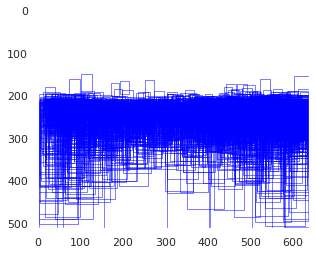

In [ ]:
##train gt
import json
all=[]
x=[]
y=[]
vo=[]
def change(x_min, y_min, x_max, y_max):
    
  x_left = x_min
  y_left = y_min
  w = x_max - x_min
  h = y_max - y_min
  all=[x_left,y_left,w,h]
  return all


with open('/content/drive/MyDrive/data_list_2/TEST_objects.json', 'r') as f:
  json_data = json.load(f)
  fig = d2l.plt.imshow(base_image)
  print(len(json_data))
  
  for i in range(len(json_data)):
    #scale=[0,0,0,0]
    for j in range(len(json_data[i]['boxes'])) :
      x_min = json_data[i]['boxes'][j][0]
      y_min = json_data[i]['boxes'][j][1]
      x_max = json_data[i]['boxes'][j][2]
      y_max = json_data[i]['boxes'][j][3]
      ch = change(x_min, y_min, x_max, y_max)
      # (x_min, y_min, x_max, y_max) -> (x_left, y_left, width, height)
      scale = [y_max,ch[3]] #(y_left,height)
      x=scale[0]
      y=scale[1]
      #if (x_min+x_max)/2<200 or (x_min+x_max)/2>400 : 
      #if (x_min+x_max)/2>200  :
      #if (x_min+x_max)/2<400  :
       #continue
      if(y_max not in vo):
        vo.append(y_max)
     #   print(json_data[i]['boxes'][j])
        #fig.axes.add_patch(bbox_to_rect(json_data[i]['boxes'][j], 'blue'))
      all.append(scale)
      fig.axes.add_patch(bbox_to_rect(json_data[i]['boxes'][j], 'blue'))


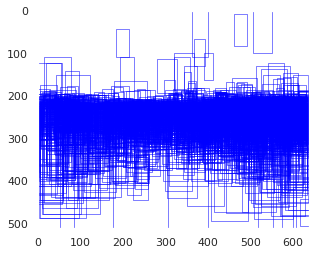

In [64]:
#test detect box
import json
all=[]
x=[]
y=[]
vo=[]
def change(x_min, y_min, x_max, y_max):
    
  x_left = x_min
  y_left = y_min
  w = x_max - x_min
  h = y_max - y_min
  all=[x_left,y_left,w,h]
  return all


with open('/content/drive/MyDrive/data_list_2/predictionssd2.json', 'r') as f:
  json_data = json.load(f)
  fig = d2l.plt.imshow(base_image)
  len(json_data)
  
  for i in range(len(json_data)):
    #scale=[0,0,0,0]
    if(json_data[i]['category_id']==0):
      continue;
    x_left = json_data[i]['bbox'][0]
    y_left = json_data[i]['bbox'][1]
    width = json_data[i]['bbox'][2]
    height = json_data[i]['bbox'][3]
    scale = [y_left+height,height] #(y_left,height)
    x=scale[0]
    y=scale[1]
    box=[]
    box=[x_left,y_left,x_left+width,y_left+height]
    #if (x_min+x_max)/2<200 or (x_min+x_max)/2>400 : 
    #if (x_min+x_max)/2>200  :
    #if (x_min+x_max)/2<400  :
    # continue
    y_max =  y_left+height
    if(y_max not in vo):
       vo.append(y_max)
     #   print(json_data[i]['boxes'][j])
    fig.axes.add_patch(bbox_to_rect(box, 'blue'))
    all.append(scale)
      #fig.axes.add_patch(bbox_to_rect(json_data[i]['boxes'][j], 'blue'))


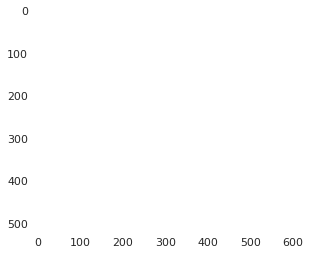

In [65]:
img_path2 = '/content/drive/MyDrive/data_list_2/white.png'
base_image2 = Image.open(img_path, mode='r')
fig = d2l.plt.imshow(base_image)

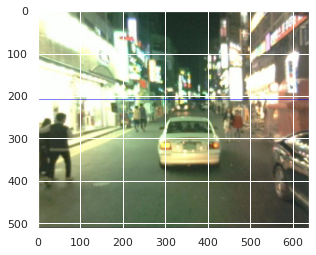

In [66]:
img_path2 = '/content/drive/MyDrive/KAIST_PD/images/set11/V000/visible/I00039.jpg'
base_image2 = Image.open(img_path2, mode='r')
fig2 = d2l.plt.imshow(base_image2)
fig2.axes.add_patch(bbox_to_rect([0,0,640,207], 'blue'))

In [67]:
print(all)

[[281.751220703125, 69.13600158691406], [281.8118896484375, 65.38784790039062], [292.34490966796875, 59.76788330078125], [255.22105407714844, 37.515960693359375], [266.23028564453125, 44.83293151855469], [265.16363525390625, 44.46656799316406], [268.93505859375, 47.24992370605469], [273.3663635253906, 55.09205627441406], [273.8956604003906, 53.83433532714844], [307.9303894042969, 83.3287353515625], [282.3408203125, 67.89970397949219], [273.40777587890625, 57.40501403808594], [259.612548828125, 49.10406494140625], [306.06951904296875, 109.00785827636719], [250.437744140625, 39.360260009765625], [262.1295471191406, 45.423126220703125], [267.9757995605469, 57.44921875], [286.3120422363281, 72.51541137695312], [270.5929870605469, 86.79434204101562], [306.7117614746094, 87.17919921875], [232.24722290039062, 66.02764892578125], [263.42779541015625, 58.769561767578125], [273.0872497558594, 76.55001831054688], [257.2833251953125, 66.47261047363281], [249.8947296142578, 55.1026611328125], [277.

In [89]:
import pandas as pd
all = pd.DataFrame(all)
all


,0,1
0,281.751221,69.136002
1,281.811890,65.387848
2,255.221054,37.515961
3,266.230286,44.832932
4,265.163635,44.466568
...,...,...
3152,270.430603,55.709396
3153,270.663971,54.103760
3154,279.867310,58.575531
3155,252.735718,57.910034


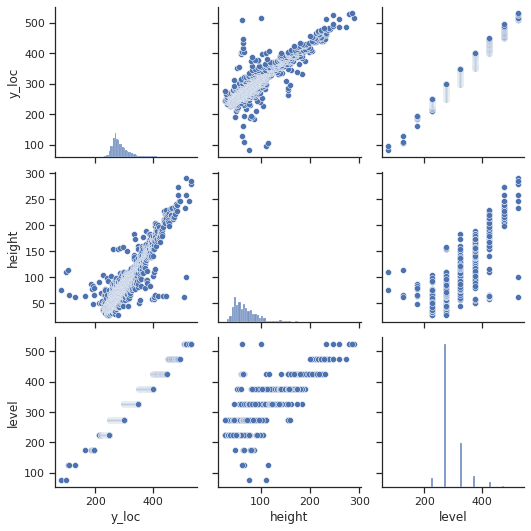

In [69]:
import seaborn as sns
sns.set_theme(style="ticks")
#df = sns.load_dataset(all)
sns.pairplot(allpd)

In [91]:
x = all[0]
x  =x.to_numpy()
x

array([281.7512207 , 255.22105408, 266.23028564, ..., 252.73571777,
       529.07666016, 529.85681152])

In [92]:
y = all[1]
y  =y.to_numpy()
y

array([ 69.13600159,  37.51596069,  44.83293152, ...,  57.91003418,
       280.43618774, 286.33158875])

In [93]:
for i in range (len(x)-1):
  if x[i]>x[i+1]:
    x[i],x[i+1] =x[i+1],x[i]
    y[i],y[i+1] =y[i+1],y[i]

In [94]:
allpd = pd.DataFrame({'y_loc':x,
                             'height':y})
allpd

,y_loc,height
0,255.221054,37.515961
1,266.230286,44.832932
2,265.163635,44.466568
3,268.935059,47.249924
4,273.366364,55.092056
...,...,...
3152,279.867310,58.575531
3153,252.735718,57.910034
3154,524.796692,246.594666
3155,529.076660,280.436188


In [95]:
y

array([ 37.51596069,  44.83293152,  44.46656799, ..., 246.59466553,
       280.43618774, 286.33158875])

In [96]:
all.columns

RangeIndex(start=0, stop=2, step=1)

           y_loc      height
0     255.221054   37.515961
1     266.230286   44.832932
2     265.163635   44.466568
3     268.935059   47.249924
4     273.366364   55.092056
...          ...         ...
3152  279.867310   58.575531
3153  252.735718   57.910034
3154  524.796692  246.594666
3155  529.076660  280.436188
3156  529.856812  286.331589

[3157 rows x 2 columns]


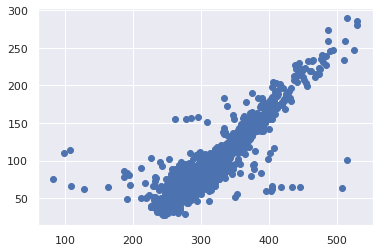

In [97]:

# Data
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
print(allpd)
#plt.hist(all,bins=10000)
plt.scatter(x,y)
plt.show()

In [98]:
allpd = pd.DataFrame({'y_loc':x,
                             'height':y})


In [78]:
#plt.hist(allpd,bins=50)
#plt.show()

In [99]:
max(x)#y_loc  최대 위치

529.8568115234375

In [80]:
max(y) # height 박스 최대 높이

290.0824279785156

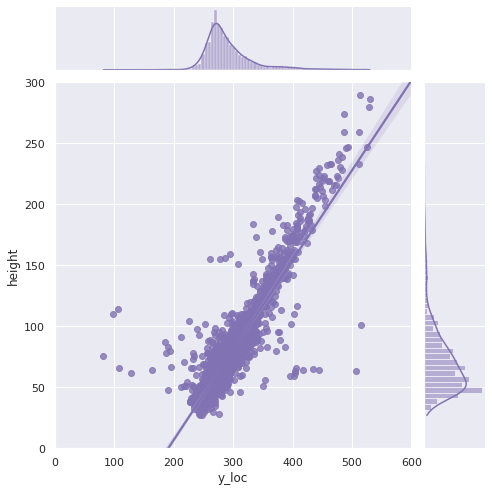

In [107]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="y_loc", y="height", data=allpd,
                  kind="reg", truncate=False,
                  xlim=(0, 600), ylim=(0, 300),
                  color="m", height=7)


In [109]:
from sklearn.svm import OneClassSVM
X = allpd
clf = OneClassSVM(gamma='auto').fit(X)
clf.predict(X)

clf.score_samples(X)

AttributeError: ignored

In [63]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = allpd['y_loc'],allpd['height']

# Use only one feature


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


Automatically created module for IPython interactive environment


ValueError: ignored

In [101]:
allpd=allpd.sort_values(by=['y_loc'])
allpd= allpd.round()


In [102]:
bins = list(range(0, 600, 50))
bins_label = [(2*x+50)/2 for x in bins]
allpd["level"] = pd.cut(allpd["y_loc"], bins, right=False, labels=bins_label[:-1])

In [103]:
allpd=allpd.astype(int)
allpd.info()
allpd

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3157 entries, 3096 to 3156
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y_loc   3157 non-null   int64
 1   height  3157 non-null   int64
 2   level   3157 non-null   int64
dtypes: int64(3)
memory usage: 98.7 KB


,y_loc,height,level
3096,82,76,75
3131,98,110,75
3109,107,114,125
798,108,66,125
787,129,62,125
...,...,...,...
1522,514,290,525
2822,515,101,525
3154,525,247,525
3155,529,280,525


In [104]:
c=allpd[{'level','height'}]
c=c.astype(int)
c=c[['level','height']]
c

,level,height
3096,75,76
3131,75,110
3109,125,114
798,125,66
787,125,62
...,...,...
1522,525,290
2822,525,101
3154,525,247
3155,525,280


In [105]:
df = c.groupby(['level'], as_index=False).mean()
c['개수']    = c.groupby(['level'])['height'].transform('count')
c['합계']    = c.groupby(['level'])['height'].transform('sum')
c['평균']    = c.groupby(['level'])['height'].transform('mean')
c['표준편차'] = c.groupby(['level'])['height'].transform('std')
c

,level,height,개수,합계,평균,표준편차
3096,75,76,2,186,93.000000,24.041631
3131,75,110,2,186,93.000000,24.041631
3109,125,114,3,242,80.666667,28.936713
798,125,66,3,242,80.666667,28.936713
787,125,62,3,242,80.666667,28.936713
...,...,...,...,...,...,...
1522,525,290,8,1759,219.875000,87.900004
2822,525,101,8,1759,219.875000,87.900004
3154,525,247,8,1759,219.875000,87.900004
3155,525,280,8,1759,219.875000,87.900004


In [106]:
df = c.groupby(['level'], as_index=False).mean()
df

,level,height,개수,합계,평균,표준편차
0,75,93.000000,2.0,186.0,93.000000,24.041631
1,125,80.666667,3.0,242.0,80.666667,28.936713
2,175,72.428571,7.0,507.0,72.428571,13.599720
3,225,44.970803,137.0,6161.0,44.970803,13.181394
4,275,59.588404,2087.0,124361.0,59.588404,13.716787
5,325,93.607088,649.0,60751.0,93.607088,15.191006
6,375,138.520710,169.0,23410.0,138.520710,23.158894
7,425,172.100000,70.0,12047.0,172.100000,42.605079
8,475,227.680000,25.0,5692.0,227.680000,17.276477
9,525,219.875000,8.0,1759.0,219.875000,87.900004


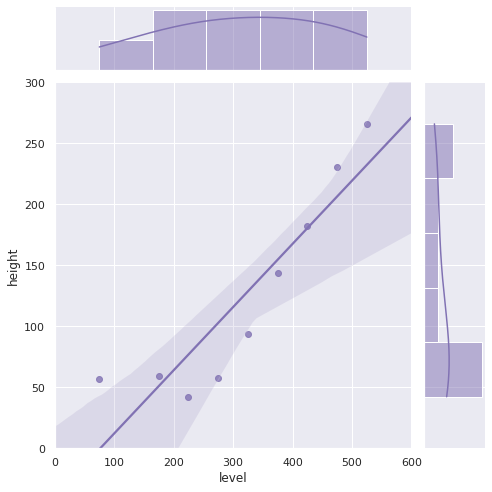

In [32]:
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="level", y="height", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 600), ylim=(0, 300),
                  color="m", height=7)

In [33]:
df[['height','level']]

,height,level
0,57.000000,75
1,59.500000,175
2,42.262963,225
3,57.754813,275
4,93.414815,325
5,143.503030,375
6,182.362069,425
7,230.954545,475
8,266.000000,525


<function matplotlib.pyplot.show>

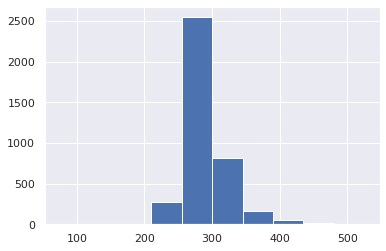

In [34]:
plt.hist(allpd['level'])
plt.show


<function matplotlib.pyplot.show>

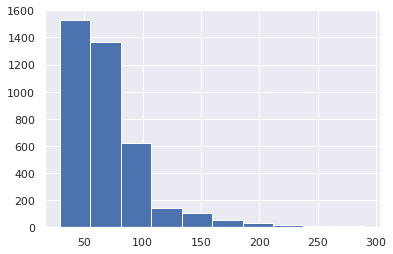

In [35]:
plt.hist(allpd['height'])
plt.show

# 구간 1

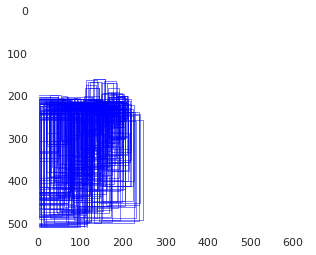

In [ ]:
import json
all=[]
x=[]
y=[]
vo=[]
def change(x_min, y_min, x_max, y_max):
    
  x_left = x_min
  y_left = y_min
  w = x_max - x_min
  h = y_max - y_min
  all=[x_left,y_left,w,h]
  return all


with open('/content/drive/MyDrive/data_list_2/TRAIN_objects.json', 'r') as f:
  json_data = json.load(f)
  fig = d2l.plt.imshow(base_image)
  len(json_data)
  
  for i in range(8730):
    #scale=[0,0,0,0]
    for j in range(len(json_data[i]['boxes'])) :
      x_min = json_data[i]['boxes'][j][0]
      y_min = json_data[i]['boxes'][j][1]
      x_max = json_data[i]['boxes'][j][2]
      y_max = json_data[i]['boxes'][j][3]
      if (x_min+x_max)/2>200 : 
        continue
      ch = change(x_min, y_min, x_max, y_max)
      # (x_min, y_min, x_max, y_max) -> (x_left, y_left, width, height)
      scale = [y_max,ch[3]] #(y_left,height)
      x=scale[0]
      y=scale[1]
      
      if(y_max not in vo):
        vo.append(y_max)
        #print(json_data[i]['boxes'][j])
        fig.axes.add_patch(bbox_to_rect(json_data[i]['boxes'][j], 'blue'))
      all.append(scale)
      #fig.axes.add_patch(bbox_to_rect(json_data[i]['boxes'][j], 'blue'))
